In [153]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv(r"C:\Users\Asani\Python\.vscode\Tugas\Data_FF.csv")

df

,Username,waktu,Komentar,Rating
0,Phyta Rayhn,2023-06-21,tolong permainan ringan karena kasihan kami y...,1
1,Komang Edirestawan,2023-06-21,baca info permainan saja terus padahal sinyal ...,2
2,Sofyan Uchup,2023-06-21,sudah update sinyal kenapa tidak stabil tolon...,2
3,Nasywan Farrel,2023-06-21,update terus semua cacat tidak urus jaringan s...,5
4,Baim Aja,2023-06-21,tidak bisa berguna update terus kita kalau mai...,1
...,...,...,...,...
4995,gusto temaluru,2023-01-11,tolong perbaiki tentang cacat luar zona hanya...,1
4996,ANM Gmg,2023-01-11,untuk pihak garena free fire indonesia tolong ...,5
4997,Adam,2023-01-11,jangan terlalu ada banyak alasan masalah pada ...,5
4998,Ferry Martua Sitorus,2023-01-11,saya mau kasih tahu buat garena free fire upda...,4


In [155]:
df["waktu"] = pd.to_datetime(df["waktu"])
df["Bulan"] = df["waktu"].dt.month

df = df[["Username","Bulan","Komentar","Rating"]]

df

,Username,Bulan,Komentar,Rating
0,Phyta Rayhn,6,tolong permainan ringan karena kasihan kami y...,1
1,Komang Edirestawan,6,baca info permainan saja terus padahal sinyal ...,2
2,Sofyan Uchup,6,sudah update sinyal kenapa tidak stabil tolon...,2
3,Nasywan Farrel,6,update terus semua cacat tidak urus jaringan s...,5
4,Baim Aja,6,tidak bisa berguna update terus kita kalau mai...,1
...,...,...,...,...
4995,gusto temaluru,1,tolong perbaiki tentang cacat luar zona hanya...,1
4996,ANM Gmg,1,untuk pihak garena free fire indonesia tolong ...,5
4997,Adam,1,jangan terlalu ada banyak alasan masalah pada ...,5
4998,Ferry Martua Sitorus,1,saya mau kasih tahu buat garena free fire upda...,4


# Analisis data berdasarkan Bulan dan Rating

### 1. grafik banyak orang mengomentari pada bulan 1 sampai 6

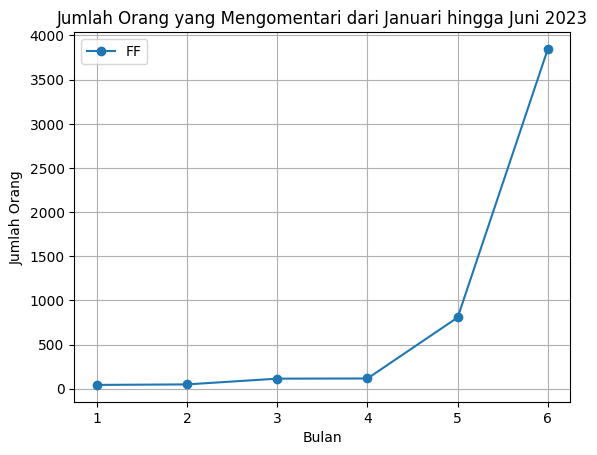

In [156]:
def count_commenters(df,month):
    filtered_df = df[(df["Bulan"] == month)]
    num_commenters = filtered_df["Username"].nunique()
    return num_commenters

# Menghitung jumlah orang yang mengomentari dari bulan Januari hingga Juni 2023 untuk masing-masing dataset
months = range(1, 7)
num_commenters1 = []

for month in months:
    num_commenters1.append(count_commenters(df, month)) 

# Membuat subplot dan plot masing-masing dataset
fig, ax = plt.subplots()

ax.plot(months, num_commenters1, marker='o', label='FF')

# Konfigurasi tambahan pada plot
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Orang')
ax.set_title('Jumlah Orang yang Mengomentari dari Januari hingga Juni 2023')
ax.set_xticks(months)
ax.grid(True)

# Menampilkan legenda
ax.legend()

# Menampilkan plot
plt.show()


terdapat kenaikan signifikan pada bulan mei-juni 2023

### 2. Melihat banyak user pada bulan tertentu yang memberikan rating

In [157]:
from datetime import datetime
import calendar

In [158]:
import pandas as pd
import calendar

# Filter dataset untuk tahun 2023 dan bulan 1-6
filtered_data = df[(df['Bulan'].between(1, 6))].copy()

# Mengubah nilai bulan menjadi nama bulan dalam urutan yang benar
filtered_data['Bulan'] = filtered_data['Bulan'].apply(lambda x: calendar.month_name[x])
filtered_data['Bulan'] = pd.Categorical(filtered_data['Bulan'], categories=calendar.month_name[1:7], ordered=True)

# Membuat tabel frekuensi rating berdasarkan bulan
rating_counts = filtered_data.groupby('Bulan')['Rating'].value_counts().unstack().fillna(0)

# Mengubah label rating
rating_counts.columns = ['Rating ' + str(rating) for rating in rating_counts.columns]

# Mereset indeks
rating_counts = rating_counts.reset_index()

df_FF = pd.DataFrame(rating_counts)
# Menampilkan hasil
print(df_FF)


      Bulan  Rating 1  Rating 2  Rating 3  Rating 4  Rating 5
0   January        19         6         1         6        11
1  February        13        10         7         9        10
2     March        30        26        22        15        21
3     April        49        18        19        14        16
4       May       237       122       153       109       188
5      June      1966       578       459       265       601


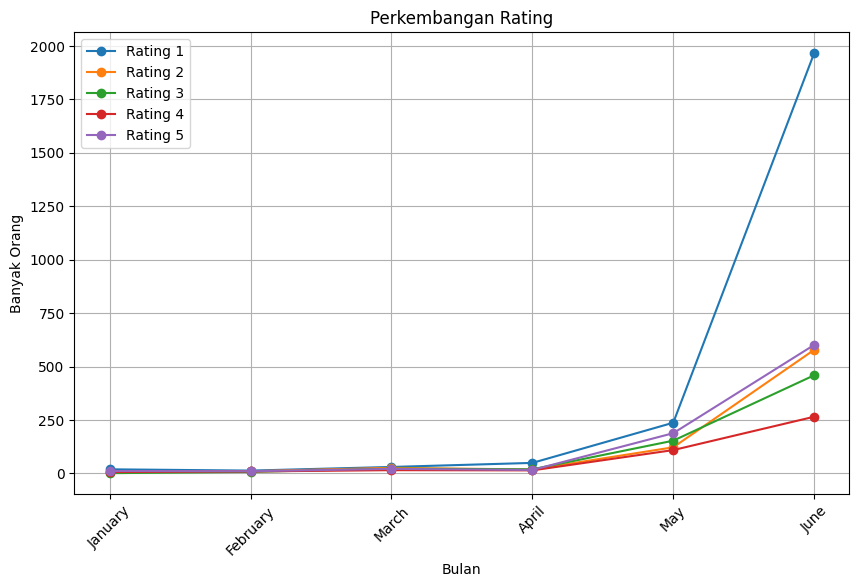

In [159]:
# Mengurutkan indeks DataFrame berdasarkan bulan
df_FF = df_FF.sort_values(by='Bulan')

plt.figure(figsize=(10, 6))  # Mengatur ukuran frame

# Memplot diagram garis untuk setiap kolom rating
for column in df_FF.columns[1:]:
    plt.plot(df_FF['Bulan'], df_FF[column], marker='o', label=column)

plt.xlabel('Bulan')
plt.ylabel('Banyak Orang')
plt.title('Perkembangan Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


ternyata banyak user yang memberikan bintang 1 pada bulai mei-juni 2023

### 3. Melihat korelasi dari setiap kolom 

C:\Users\Asani\AppData\Local\Temp\ipykernel_4668\2925864054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_FF.corr()


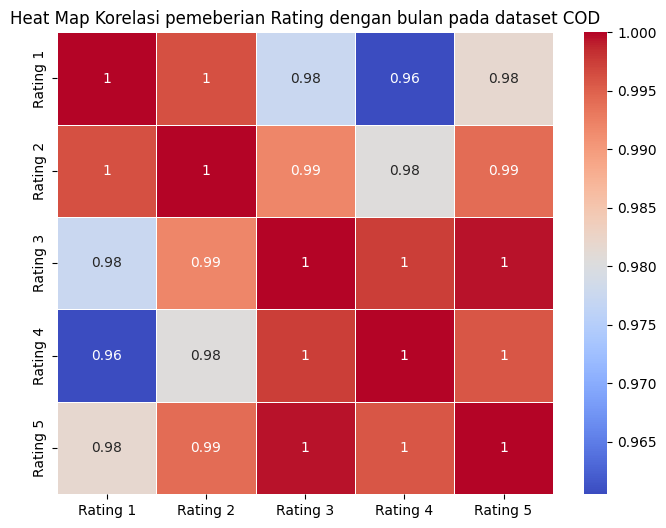

In [160]:
# Menghitung korelasi antara kolom-kolom pada DataFrame rating_counts
correlation_matrix = df_FF.corr()

# Membuat heat map dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map Korelasi pemeberian Rating dengan bulan pada dataset COD')
plt.show()

# Analisis data berdasarkan Komentar

### 1. Melihat jumlah kata pada kolom komentar

In [161]:

df["Jumlah_Kata"] = df["Komentar"].apply(lambda x: len(x.split()))

df

,Username,Bulan,Komentar,Rating,Jumlah_Kata
0,Phyta Rayhn,6,tolong permainan ringan karena kasihan kami y...,1,27
1,Komang Edirestawan,6,baca info permainan saja terus padahal sinyal ...,2,19
2,Sofyan Uchup,6,sudah update sinyal kenapa tidak stabil tolon...,2,18
3,Nasywan Farrel,6,update terus semua cacat tidak urus jaringan s...,5,19
4,Baim Aja,6,tidak bisa berguna update terus kita kalau mai...,1,29
...,...,...,...,...,...
4995,gusto temaluru,1,tolong perbaiki tentang cacat luar zona hanya...,1,49
4996,ANM Gmg,1,untuk pihak garena free fire indonesia tolong ...,5,56
4997,Adam,1,jangan terlalu ada banyak alasan masalah pada ...,5,39
4998,Ferry Martua Sitorus,1,saya mau kasih tahu buat garena free fire upda...,4,59


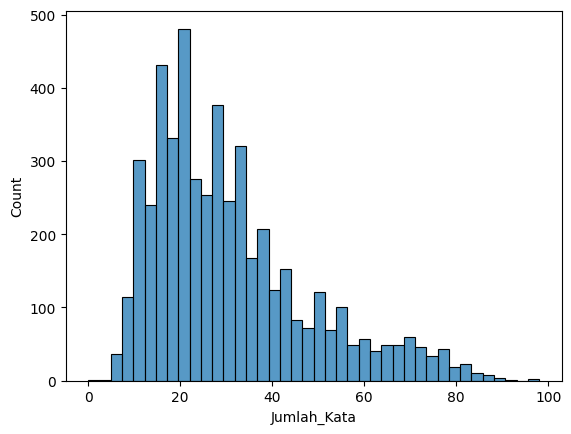

In [162]:
sns.histplot(data=df, x="Jumlah_Kata")
plt.show()

In [163]:
df["Komentar"]= df["Komentar"].str.replace(r'\b(kalau|jadi)\b', '', regex=True)

In [164]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory() ##membuat sebuah pabrik penghasil stopword
stopword = factory.create_stop_word_remover() #menghasilkan sebuah objek penghapus stopword

stopwords_set = set() ## sebuah set untuk menampung stopword

# Mengumpulkan daftar stop words dari ketiga dataset
for comment in df["Komentar"]:
    words = comment.split()
    stopwords = [word for word in words if stopword.remove(word) == ""] #menyimpan kata-kata yang dianggap stopword dalam stopwords
    stopwords_set.update(stopwords) #melakukan update pada stopword_set

print(stopwords_set)

{'untuk', 'saja', 'ketika', 'nanti', 'walau', 'dalam', 'namun', 'seperti', 'sementara', 'supaya', 'antara', 'karena', 'sebelum', 'yang', 'kami', 'selagi', 'ia', 'hal', 'oh', 'sambil', 'dimana', 'atau', 'tolong', 'harus', 'selain', 'pasti', 'juga', 'tentu', 'lain', 'jika', 'akan', 'saya', 'setiap', 'di', 'sebab', 'tentang', 'bahwa', 'pada', 'sampai', 'boleh', 'dengan', 'ok', 'oleh', 'bagi', 'tetapi', 'sehingga', 'sekitar', 'dia', 'tidak', 'ke', 'dua', 'toh', 'maka', 'belum', 'dari', 'apalagi', 'sudah', 'guna', 'mari', 'anda', 'yaitu', 'kembali', 'saat', 'itu', 'telah', 'demikian', 'daripada', 'amat', 'dan', 'ya', 'bisa', 'sesuatu', 'masih', 'tapi', 'dulunya', 'para', 'begitu', 'mengapa', 'dapat', 'hanya', 'demi', 'pula', 'apakah', 'agar', 'dsb', 'lagi', 'agak', 'kah', 'ini', 'kecuali', 'serta', 'pun', 'dll', 'adalah', 'tanpa', 'ada', 'nggak', 'kita', 'kepada', 'ingin', 'dahulu', 'kenapa', 'mereka'}


In [165]:
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords_set]
    clean_text = ' '.join(clean_word_list)
    return clean_text

stopwords_text_FF = df['Komentar'].apply(removeStopWords)

df = df.assign(Komentar=stopwords_text_FF)

df

,Username,Bulan,Komentar,Rating,Jumlah_Kata
0,Phyta Rayhn,6,permainan ringan kasihan hp kuat kamu lebih su...,1,27
1,Komang Edirestawan,6,baca info permainan terus padahal sinyal bagus...,2,19
2,Sofyan Uchup,6,update sinyal stabil dong garena perbaiki siny...,2,18
3,Nasywan Farrel,6,update terus semua cacat urus jaringan main pe...,5,19
4,Baim Aja,6,berguna update terus main csr temen cupu musuh...,1,29
...,...,...,...,...,...
4995,gusto temaluru,1,perbaiki cacat luar zona tunggu zona susut rim...,1,49
4996,ANM Gmg,1,pihak garena free fire indonesia perbaiki caca...,5,56
4997,Adam,1,jangan terlalu banyak alasan masalah permainan...,5,39
4998,Ferry Martua Sitorus,1,mau kasih tahu buat garena free fire update se...,4,59


In [166]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

target_months = [6]  # Bulan Mei dan Juni

for month in target_months:
    # Menggabungkan semua komentar dari bulan yang ditentukan menjadi satu teks
    all_comments = ' '.join([word for comment, m in zip(df['Komentar'].tolist(), df['Bulan'].tolist()) if m == month for word in word_tokenize(comment)])

    # Tokenisasi kata
    tokens = word_tokenize(all_comments)

    # Menghitung frekuensi kata
    fdist = FreqDist(tokens)

    # Mengambil 10 kata dengan frekuensi tertinggi
    most_common_words = fdist.most_common(10)

    print(f"10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan {month}:")
    for word, frequency in most_common_words:
        print(word, ":", frequency)
    print()


10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan 6:
permainan : 2248
semakin : 2121
main : 2095
cacat : 1937
update : 1703
perbaiki : 1589
bagus : 1566
garena : 1270
free : 1248
fire : 1225



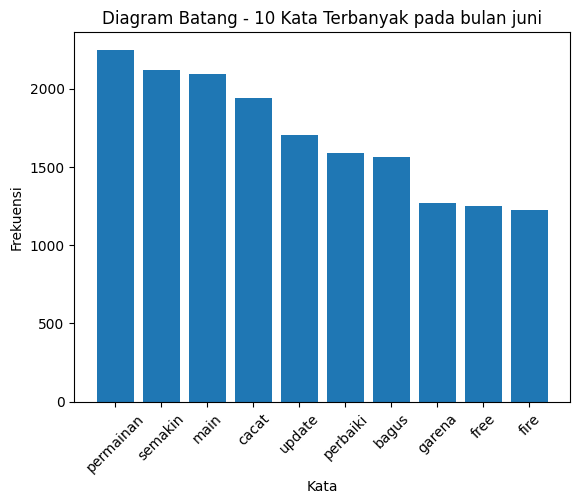

In [167]:
# Data kata-kata dan frekuensinya
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Membuat diagram batang
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang - 10 Kata Terbanyak pada bulan juni')
plt.xticks(rotation=45)
plt.show()

In [168]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

target_months = [5]  # Bulan Mei dan Juni

for month in target_months:
    # Menggabungkan semua komentar dari bulan yang ditentukan menjadi satu teks
    all_comments = ' '.join([word for comment, m in zip(df['Komentar'].tolist(), df['Bulan'].tolist()) if m == month for word in word_tokenize(comment)])

    # Tokenisasi kata
    tokens = word_tokenize(all_comments)

    # Menghitung frekuensi kata
    fdist = FreqDist(tokens)

    # Mengambil 10 kata dengan frekuensi tertinggi
    most_common_words = fdist.most_common(10)

    print(f"10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan {month}:")
    for word, frequency in most_common_words:
        print(word, ":", frequency)
    print()

10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan 5:
permainan : 545
main : 481
semakin : 433
cacat : 396
update : 388
bagus : 345
perbaiki : 322
free : 292
fire : 292
jaringan : 233



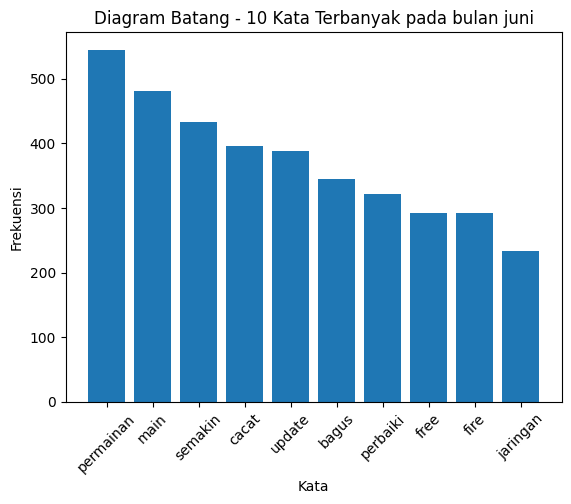

In [169]:
# Data kata-kata dan frekuensinya
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Membuat diagram batang
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang - 10 Kata Terbanyak pada bulan juni')
plt.xticks(rotation=45)
plt.show()

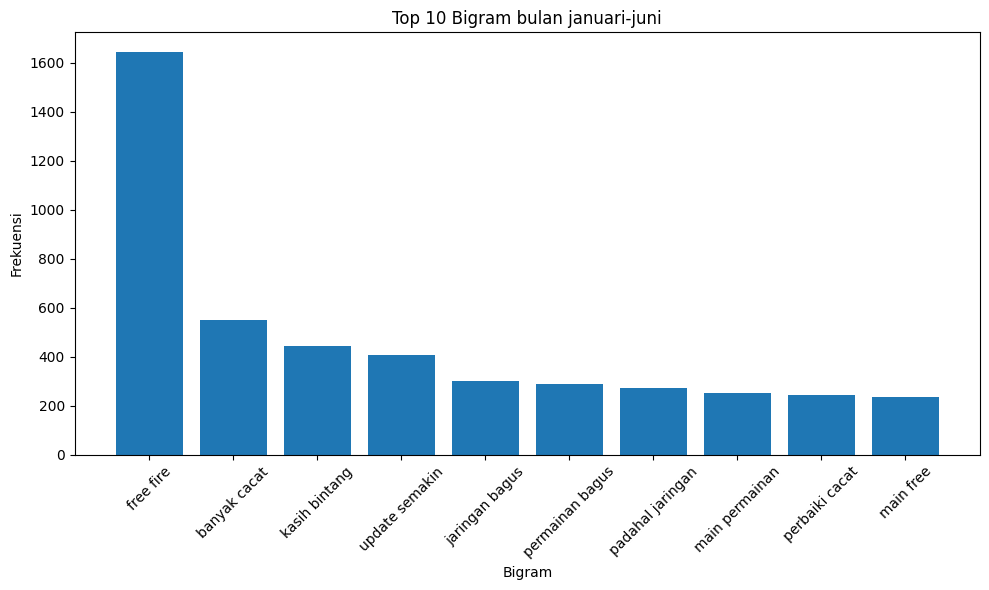

In [170]:
import nltk
from nltk import bigrams, word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt

# Mengambil kolom komentar
komentar = df['Komentar']

# Tokenisasi kata-kata dalam setiap komentar
token_komentar = komentar.apply(lambda x: word_tokenize(str(x)))

# Mendapatkan bigram untuk setiap komentar
bigram_komentar = token_komentar.apply(lambda x: list(bigrams(x)))

# Menggabungkan semua bigram dari seluruh komentar
all_bigrams = [bg for sublist in bigram_komentar for bg in sublist]

# Menghitung frekuensi kemunculan setiap bigram
freq_dist = FreqDist(all_bigrams)

# Mengurutkan bigram berdasarkan frekuensi kemunculan
sorted_bigrams = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Mengambil 10 bigram teratas
top_10_bigrams = sorted_bigrams[:10]

# Membuat list label dan frekuensi dari 10 bigram teratas
labels = [f"{bg[0][0]} {bg[0][1]}" for bg in top_10_bigrams]
frequencies = [bg[1] for bg in top_10_bigrams]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Bigram')
plt.ylabel('Frekuensi')
plt.title('Top 10 Bigram bulan januari-juni')
plt.tight_layout()
plt.show()


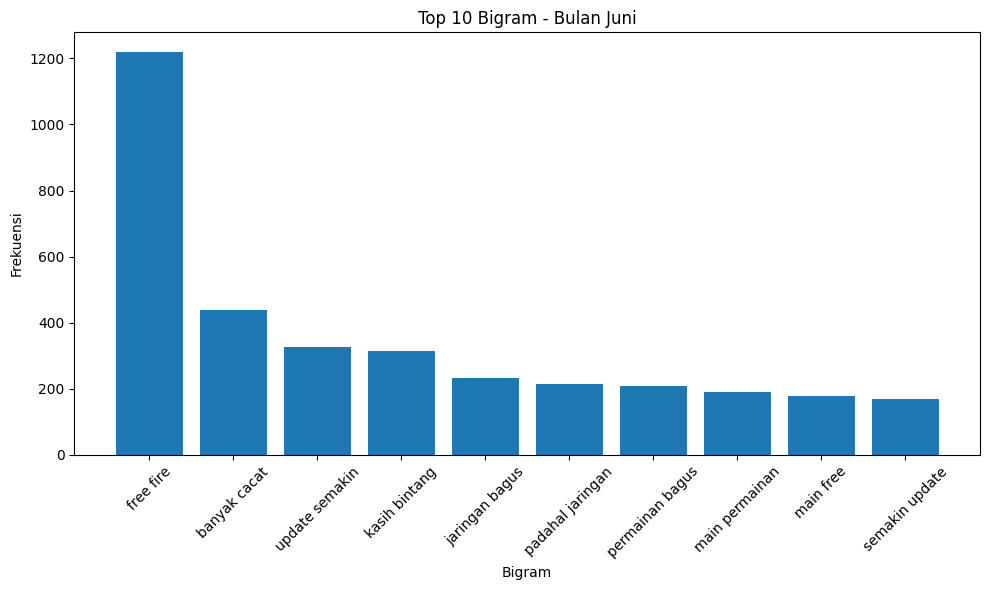

In [171]:
# Filter data hanya untuk bulan Juni
df_june = df[df['Bulan'] == 6]

# Tokenisasi kata-kata dalam setiap komentar
token_komentar = df_june['Komentar'].apply(lambda x: word_tokenize(str(x)))

# Mendapatkan bigram untuk setiap komentar
bigram_komentar = token_komentar.apply(lambda x: list(bigrams(x)))

# Menggabungkan semua bigram dari seluruh komentar
all_bigrams = [bg for sublist in bigram_komentar for bg in sublist]

# Menghitung frekuensi kemunculan setiap bigram
freq_dist = FreqDist(all_bigrams)

# Mengurutkan bigram berdasarkan frekuensi kemunculan
sorted_bigrams = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Mengambil 10 bigram teratas
top_10_bigrams = sorted_bigrams[:10]

# Membuat list label dan frekuensi dari 10 bigram teratas
labels = [f"{bg[0][0]} {bg[0][1]}" for bg in top_10_bigrams]
frequencies = [bg[1] for bg in top_10_bigrams]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Bigram')
plt.ylabel('Frekuensi')
plt.title('Top 10 Bigram - Bulan Juni')
plt.tight_layout()
plt.show()

Kesimpulan :
dari hasil analisis komentar menggunakan N-gram terdapat beberapa yang harus diperbaiki
1. terdapat banyak cacat (BUG) pada update mei-juni dimana masalah jaringan harus di segera diperbaiki
2. update yang dilakukan pada Mei-juni masih banyak error bagi pemain.